# Microplásticos

In [ ]:
from typing import Tuple, List
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from time import time

In [ ]:
def read_image_label(path_to_img: str, path_to_txt: str, normilize: bool = False) -> Tuple[np.array, np.array]:

    # read image
    image = cv2.imread(path_to_img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_h, img_w = image.shape[:2]

    # read .txt file for this image
    with open(path_to_txt, "r") as f:
        txt_file = f.readlines()[0].split()
        cls_idx = txt_file[0]
        coords = txt_file[1:]
        polygon = np.array([[eval(x), eval(y)] for x, y in zip(coords[0::2], coords[1::2])]) # convert list of coordinates to numpy massive

    # Convert normilized coordinates of polygons to coordinates of image
    if normilize:
        polygon[:,0] = polygon[:,0]*img_w
        polygon[:,1] = polygon[:,1]*img_h
    return image, polygon.astype(np.int32)


def show_image_mask(img: np.array, polygon: np.array, alpha: float = 0.7):

    # Create zero array for mask
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    overlay = img.copy()

    # Draw polygon on the image and mask
    cv2.fillPoly(mask, pts=[polygon], color=(255, 255, 255))
    cv2.fillPoly(img, pts=[polygon], color=(255, 0, 0))
    cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)

    # Plot image with mask
    fig = plt.figure(figsize=(22,18))
    axes = fig.subplots(nrows=1, ncols=2)
    axes[0].imshow(img)
    axes[1].imshow(mask, cmap="Greys_r")
    axes[0].set_title("Original image with mask")
    axes[1].set_title("Mask")

    # cv2.imwrite("/Users/vladislavefremov/Disk/Vlad/Job/Lab/Priroda/Datasets/whale_draft/20_04_crop2_DJI_0202_450.png", mask)

    plt.show()

In [ ]:
image, polygon = read_image_label(path_to_img="/content/fragment-01-olympus-14-05-2020-esc-01-bright-contrast.JPG",
                                 path_to_txt="/content/fragment-01-olympus-14-05-2020-esc-01-bright-contrast.txt",
                                 normilize=True)

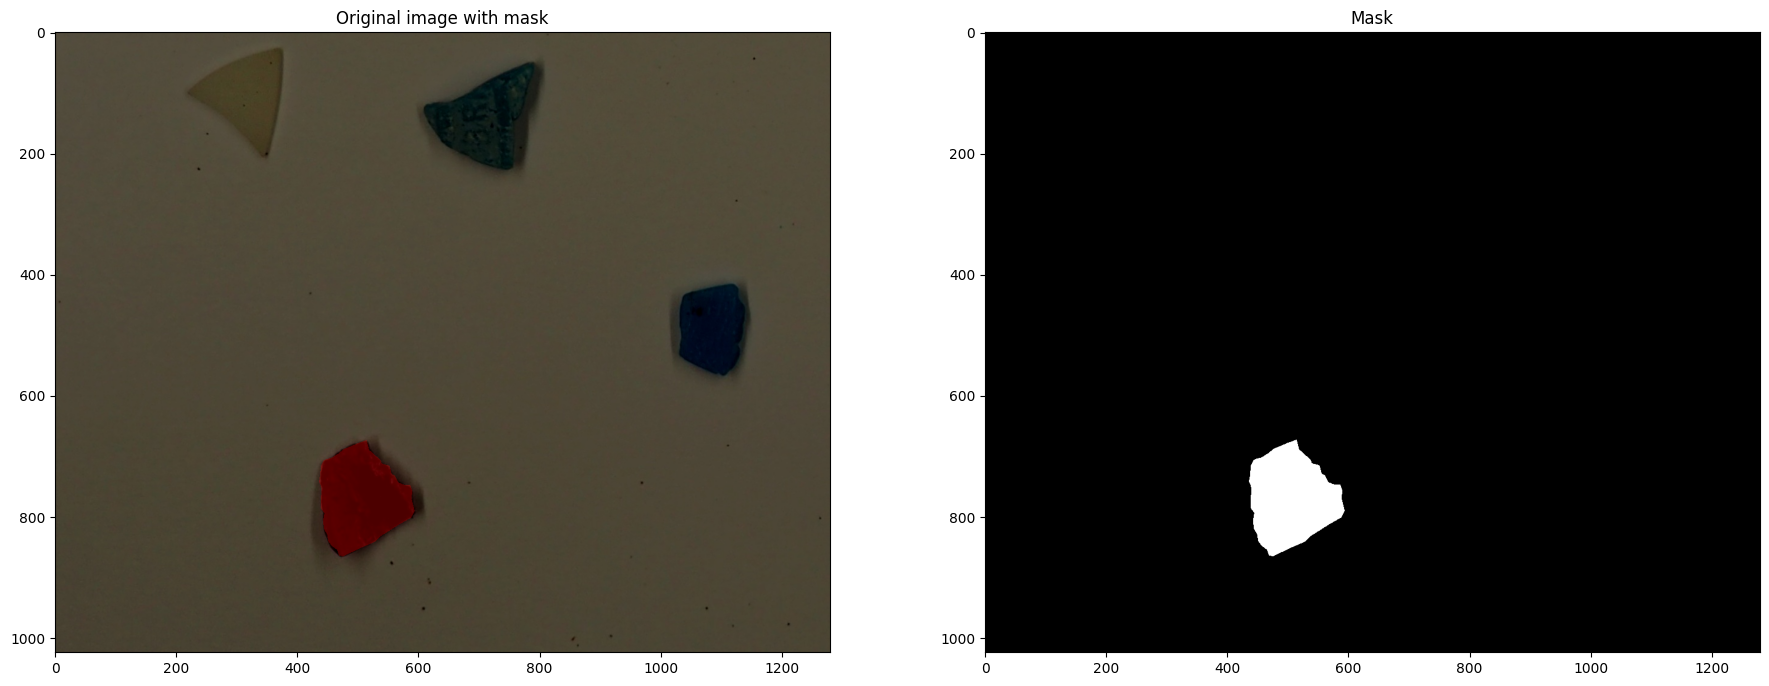

In [ ]:
show_image_mask(img=image, polygon=polygon)

## Installation and setup dataset

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip /content/gdrive/MyDrive/TFG/microplasticos-dataset-80-20.zip > /dev/null

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 15814 (delta 9), reused 24 (delta 1), pack-reused 15768
Receiving objects: 100% (15814/15814), 14.64 MiB | 20.71 MiB/s, done.
Resolving deltas: 100% (10818/10818), done.
/content/yolov5


In [3]:
%pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.9/626.9 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


In [4]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


## Training dataset

In [7]:
!python segment/train.py --data "/content/yolov5/microplasticosTFG-dataset-80-20/images/data.yaml" --weights yolov5s-seg.pt --img 1280 --batch-size 8 --epochs 200 --project "/content/gdrive/MyDrive/TFG" --name "200epochs-batch8-weights-data-augmentation-completed-80-20-1280"

segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/microplasticosTFG-dataset-80-20/images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/gdrive/MyDrive/TFG, name=200epochs-batch8-weights-data-augmentation-completed-80-20-1280, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1